In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
import seaborn as sns
from Functions import coef_weights,find_optimal_lm_mod
%matplotlib inline

df_0 = pd.read_csv('./airline.csv')
df_0.head()

,ActualElapsedTime,AirTime,ArrDelay,ArrTime,CRSArrTime,CRSDepTime,CRSElapsedTime,CancellationCode,Cancelled,CarrierDelay,...,Month,NASDelay,Origin,SecurityDelay,TailNum,TaxiIn,TaxiOut,UniqueCarrier,WeatherDelay,Year
0,154.0,122.0,90.0,1850.0,1720,1455,145.0,NaN,0,0.0,...,6,23.0,ORD,0.0,N293AA,8.0,24.0,AA,0.0,2006
1,159.0,125.0,59.0,1703.0,1604,1510,114.0,NaN,0,NaN,...,9,NaN,DTW,NaN,N8921E,19.0,15.0,NW,NaN,1997
2,NaN,71.0,NaN,NaN,1140,1037,63.0,NaN,1,NaN,...,2,NaN,CVG,NaN,N331DL,4.0,15.0,DL,NaN,1995
3,70.0,NaN,80.0,20.0,2300,2100,60.0,NaN,0,NaN,...,2,NaN,MDW,NaN,NaN,NaN,NaN,ML (1),NaN,1991
4,150.0,135.0,5.0,2030.0,2025,1740,165.0,NaN,0,NaN,...,2,NaN,PHL,NaN,N512AU,3.0,12.0,US,NaN,1997


In [2]:
airlines= pd.read_csv('./carriers.csv')
Airline_dict= {}
for i in range(airlines.shape[0]):
    if airlines.loc[i]['Code'] in possible_vals:
        Airline_dict[airlines.loc[i]['Code']] = airlines.loc[i]['Description']
airline_df = pd.DataFrame.from_dict(Airline_dict,orient='index', columns = ['Airline_Name'])
airline_df

NameError: name 'possible_vals' is not defined

### Drop the columns that have more than 60% of NaN or Null values

In [3]:
df = df_0[df_0.columns[df_0.isnull().mean()<.6]]

In [4]:
df.shape

(1235350, 23)

### Description of Column names

In [5]:
df.columns

Index(['ActualElapsedTime', 'AirTime', 'ArrDelay', 'ArrTime', 'CRSArrTime',
       'CRSDepTime', 'CRSElapsedTime', 'Cancelled', 'DayOfWeek', 'DayofMonth',
       'DepDelay', 'DepTime', 'Dest', 'Distance', 'Diverted', 'FlightNum',
       'Month', 'Origin', 'TailNum', 'TaxiIn', 'TaxiOut', 'UniqueCarrier',
       'Year'],
      dtype='object')

In [6]:
round(df['Cancelled'].value_counts()[1]/df['Cancelled'].value_counts()[0]*100,2)

1.91

# Which Airline had more canceled flights between 1987-2008?

### Find the total number of flights per carrier

Text(0.5, 1.0, 'Total number of flights for each Carrier [1987-2008]')

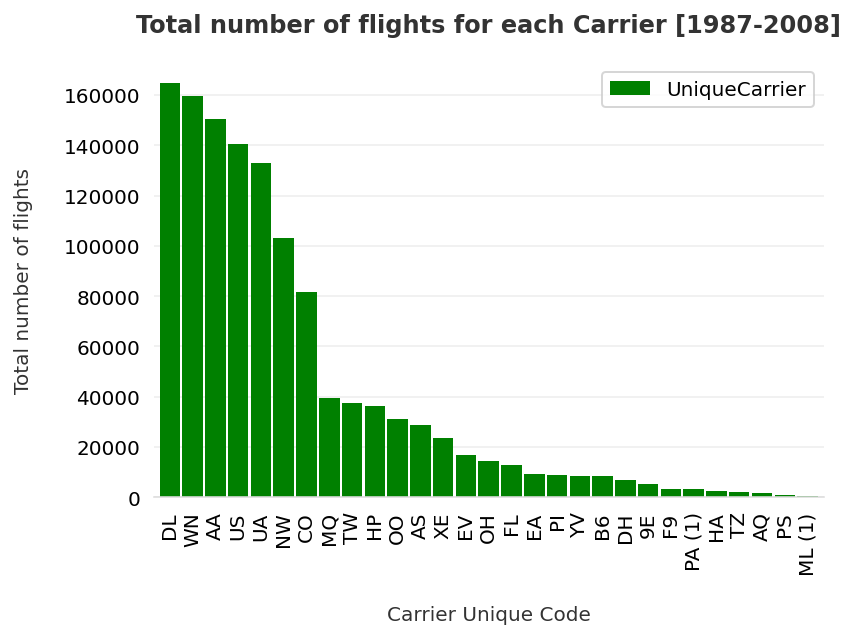

In [7]:
df_airline_tot = pd.DataFrame(df["UniqueCarrier"].value_counts())
ax = df_airline_tot.plot.bar(width=0.9,color='green');

# Chart format
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Carrier Unique Code', labelpad=15, color='#333333')
ax.set_ylabel('Total number of flights', labelpad=15, color='#333333')
ax.set_title('Total number of flights for each Carrier [1987-2008]', pad=15, color='#333333',
             weight='bold')


## Plot the cancelled flights per carrier

In [8]:
possible_vals = list(df.UniqueCarrier.unique()) # Find the carrier codes

In [28]:
from collections import defaultdict
new_df = defaultdict(int)                       # define empty dict
for val in possible_vals:                       # Loop through the carriers and count how many cancelled pere carrier
    for idx in range(df.shape[0]):
        if df['UniqueCarrier'][idx] == val and df['Cancelled'][idx] == 1:
            new_df[val] += 1
df_Cancelled_count = pd.DataFrame.from_dict(new_df,orient='index',
                                            columns = ['Cancelled_count']).sort_values('Cancelled_count',ascending=False)

Text(0.5, 1.0, 'Total number of cancelled flights for each Carrier [1987-2008]')

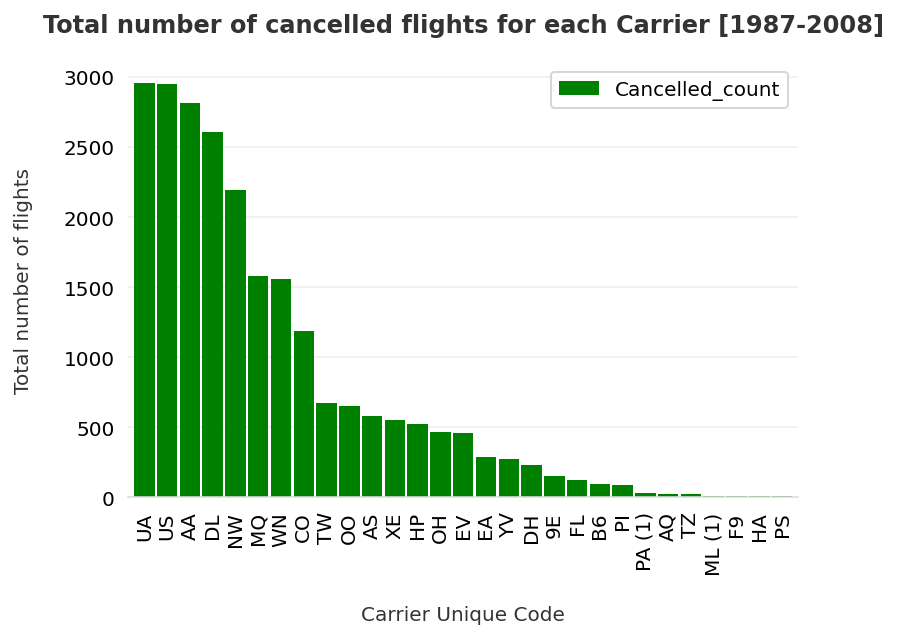

In [63]:
ax2  =df_Cancelled_count.plot.bar(width=0.9,color='green');
# Chart format

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
# Axis formatting.
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['left'].set_visible(False)
ax2.spines['bottom'].set_color('#DDDDDD')
ax2.tick_params(bottom=False, left=False)
ax2.set_axisbelow(True)
ax2.yaxis.grid(True, color='#EEEEEE')
ax2.xaxis.grid(False)

ax2.set_xlabel('Carrier Unique Code', labelpad=15, color='#333333')
ax2.set_ylabel('Total number of flights', labelpad=15, color='#333333')
ax2.set_title('Total number of cancelled flights for each Carrier [1987-2008]', pad=15, color='#333333',
             weight='bold')



## Plot the cancelled flight per carrier in percentage of total flights for each carrier.

Text(0.5, 1.0, 'Percentage of cancelled flights for each Carrier [1987-2008]')

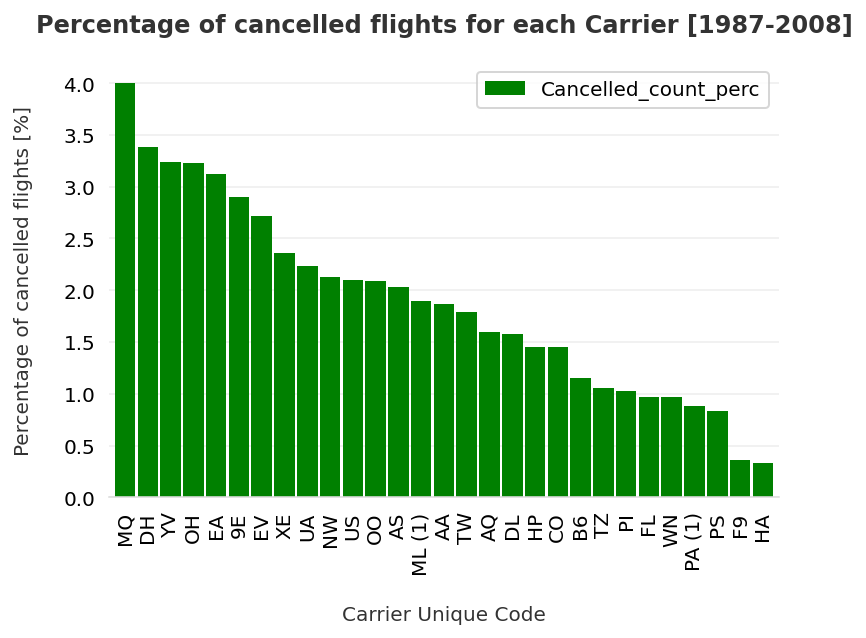

In [38]:
df_Cancelled_count_perc = pd.DataFrame()
for a in df_Cancelled_count.itertuples():
    for b in df_airline_tot.itertuples():
        if a[0]==b[0]:
            df_Cancelled_count_perc.at[a[0],'Cancelled_count_perc']= round(a[1]/b[1]*100,2)
            
ax = df_Cancelled_count_perc.sort_values('Cancelled_count_perc',ascending=False).plot.bar(width=0.9,color='green');
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina', quality=100)
# Axis formatting.
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_color('#DDDDDD')
ax.tick_params(bottom=False, left=False)
ax.set_axisbelow(True)
ax.yaxis.grid(True, color='#EEEEEE')
ax.xaxis.grid(False)

ax.set_xlabel('Carrier Unique Code', labelpad=15, color='#333333')
ax.set_ylabel('Percentage of cancelled flights [%]', labelpad=15, color='#333333')
ax.set_title('Percentage of cancelled flights for each Carrier [1987-2008]', pad=15, color='#333333',
             weight='bold')

# When is the best time of day/day of week/time of year to fly to minimise delays?

In [9]:
df_delays = df.filter(['ArrDelay','DepDelay', 'DayofMonth','Month','Year','Origin']).dropna(axis=0)
df_delays['TotDelay'] = df_delays['ArrDelay']+ df_delays['DepDelay']
df_delays['date'] = pd.to_datetime(df['Year'].astype(str) + df['Month'].astype(str)+ df['DayofMonth'].astype(str),
 format = '%Y%m%d')
#df_delays['dateweek'] = df_delays['date'].dt.day_name()

Text(0.5, 1.0, 'Correlation of delays with day & time of the year')

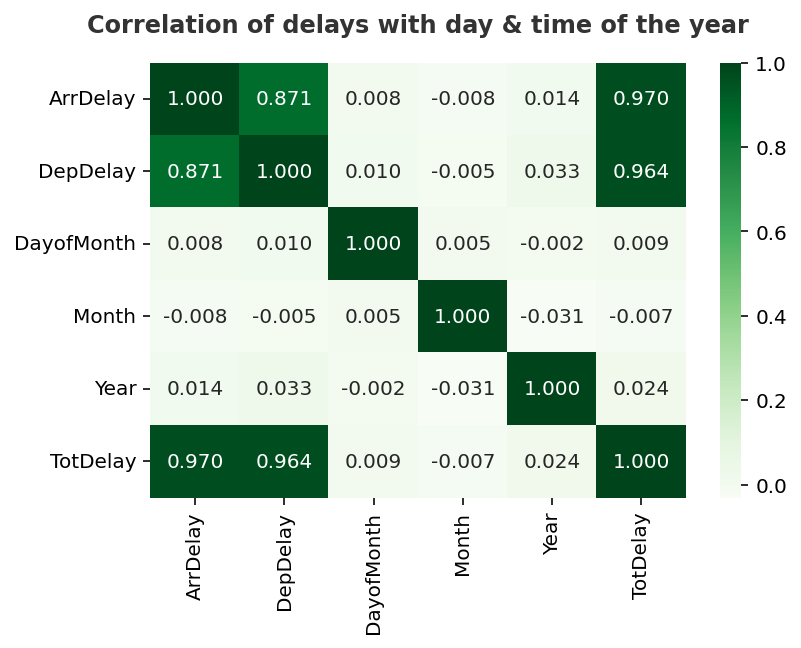

In [10]:
ax = sns.heatmap(df_delays.corr(),annot=True,fmt='.3f',cmap="Greens"); 
ax.set_title('Correlation of delays with day & time of the year', pad=15, color='#333333',
             weight='bold')

# Is there  city where there are more cancelled flights?

In [65]:
df.filter(['ArrDelay','DepDelay', 'DayofMonth','Month','Year','Origin']).dropna(axis=0)
df_cancelled = df.loc[df['Cancelled'] == 1]
df_cancelled_f = df_cancelled.filter(['Origin','Dest']).dropna(axis=0)
df_cancelled_f['date'] = pd.to_datetime(df['Year'].astype(str) + df['Month'].astype(str)+ df['DayofMonth'].astype(str),
 format = '%Y%m%d')

In [66]:
cat_df = df_cancelled_f.select_dtypes(include=['object'])
for col in  cat_df:
    cat_df= pd.concat([cat_df.drop(col, axis=1), pd.get_dummies(cat_df[col], prefix=col, prefix_sep='_', drop_first=True, dummy_na=False)], axis=1)


In [67]:
X =cat_df 
y = df_cancelled_f.filter(['date'])
import datetime as dt
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)
y_train['date']=y_train['date'].map(dt.datetime.toordinal)
y_test['date']=y_test['date'].map(dt.datetime.toordinal)
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
y_test_predict = lm_model.predict(X_test)# Predictions here
y_train_predict = lm_model.predict(X_train)# Predictions here

C:\Users\caleb\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [68]:
r2_score(y_test, y_test_predict) 


-6.320805512386436e+25

In [69]:
r2_score(y_train, y_train_predict)

0.10745737126871568

# Why are delays caused? 
- CarrierDelay	   
- WeatherDelay	   
- NASDelay	        
- SecurityDelay	  
- LateAircraftDelay	  

In [16]:
del_caus_df = df_0[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay','ArrDelay','DepDelay']].dropna(axis=0,how='any')
del_caus_df['TotDelay'] = del_caus_df['ArrDelay']+ del_caus_df['DepDelay']


In [17]:
fill_mean = lambda col: col.fillna(0)
del_caus_df=del_caus_df.apply(fill_mean, axis=0) # Apply the function
del_caus_df

,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,ArrDelay,DepDelay,TotDelay
0,0.0,0.0,23.0,0.0,67.0,90.0,81.0,171.0
8,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,-1.0
13,0.0,0.0,0.0,0.0,0.0,-6.0,-7.0,-13.0
18,0.0,0.0,0.0,0.0,0.0,5.0,-1.0,4.0
19,0.0,0.0,0.0,0.0,0.0,-25.0,-4.0,-29.0
...,...,...,...,...,...,...,...,...
1235336,0.0,0.0,0.0,0.0,20.0,20.0,22.0,42.0
1235337,0.0,0.0,0.0,0.0,0.0,-6.0,0.0,-6.0
1235343,0.0,0.0,0.0,0.0,0.0,-4.0,2.0,-2.0
1235344,0.0,0.0,0.0,0.0,0.0,9.0,14.0,23.0


In [18]:
cat_del_caus_df =del_caus_df[['CarrierDelay', 'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay']]

In [19]:
rep_num=lambda x: [1 if y > 0 else 0 for y in x]
cat_del_caus_df = cat_del_caus_df.apply(rep_num,axis=0)

In [20]:
X = cat_del_caus_df
y = del_caus_df['TotDelay'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=42)
lm_model = LinearRegression(normalize=True) 
lm_model.fit(X_train, y_train) 
y_test_predict = lm_model.predict(X_test)# Predictions here
y_train_predict = lm_model.predict(X_train)# Predictions here

C:\Users\caleb\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [21]:
r2_score(y_test, y_test_predict) 

0.3685385088987976

In [22]:
r2_score(y_train, y_train_predict)

0.38656062576594974

Text(0.5, 1.0, 'Correlation of delays with itrs causes')

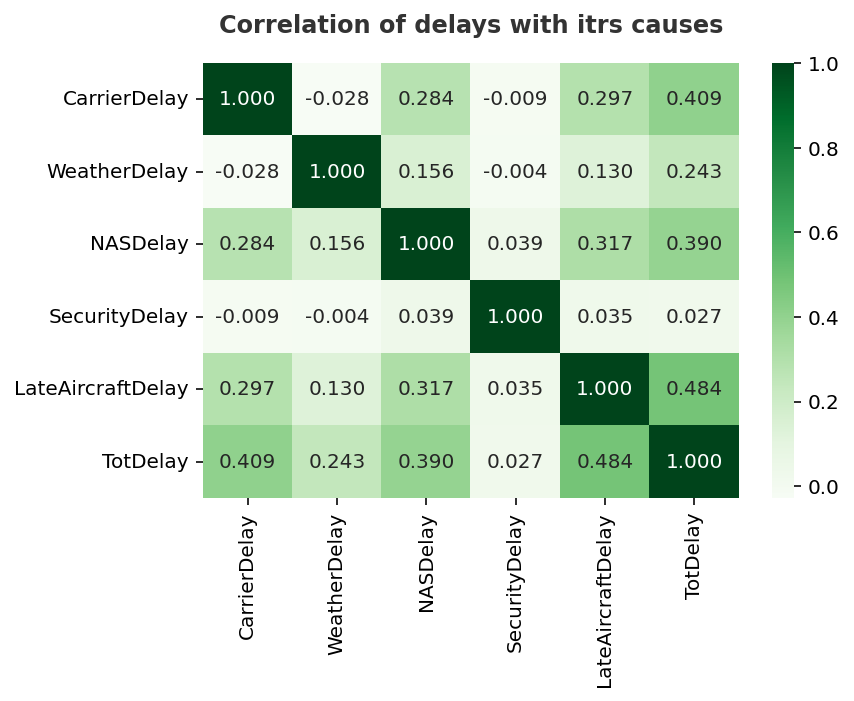

In [35]:
df_new = X.join(y)
ax = sns.heatmap(df_new.corr(),annot=True,fmt='.3f',cmap="Greens"); 
ax.set_title('Correlation of delays with itrs causes', pad=15, color='#333333',
             weight='bold')

In [24]:
cat_del_caus_df['CarrierDelay'].value_counts()[1]/cat_del_caus_df['CarrierDelay'].shape[0]*100

10.897092760450121

In [25]:
cat_del_caus_df['WeatherDelay'].value_counts()[1]/cat_del_caus_df['WeatherDelay'].shape[0]*100

1.8684723907406084

In [26]:
cat_del_caus_df['NASDelay'].value_counts()[1]/cat_del_caus_df['NASDelay'].shape[0]*100

15.288880165584185

In [27]:
cat_del_caus_df['SecurityDelay'].value_counts()[1]/cat_del_caus_df['SecurityDelay'].shape[0]*100

0.13233649751385818

In [28]:
cat_del_caus_df['LateAircraftDelay'].value_counts()[1]/cat_del_caus_df['LateAircraftDelay'].shape[0]*100

11.11150762496134

C:\Users\caleb\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
C:\Users\caleb\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model =

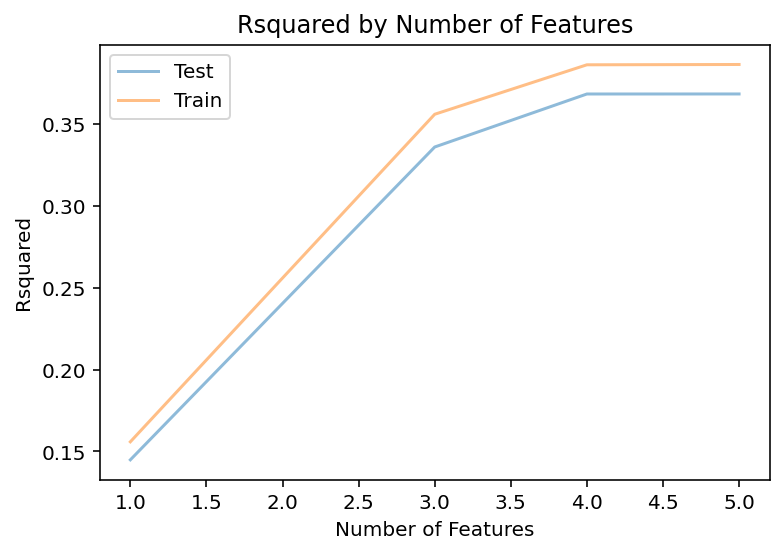

C:\Users\caleb\anaconda3\lib\site-packages\sklearn\linear_model\_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,


In [29]:
cutoffs = np.arange(0, 50000, 5000).tolist()

#Run this cell to pass your X and y to the model for testing
r2_scores_test, r2_scores_train, lm_model, X_train, X_test, y_train, y_test = find_optimal_lm_mod(X, y, cutoffs)

In [30]:
#Use the function
coef_df = coef_weights(lm_model.coef_, X_train)

#A quick look at the top results
coef_df.head()

,est_int,coefs,abs_coefs
1,WeatherDelay,94.067915,94.067915
4,LateAircraftDelay,74.319873,74.319873
0,CarrierDelay,61.386138,61.386138
2,NASDelay,37.385785,37.385785
3,SecurityDelay,26.510705,26.510705
